# RNN - LSTM - Toxic Comments

A corpus of manually labeled comments - classifying each comment by its type of toxicity is available on Kaggle. 

We will aim to do a binary classification of whether a comment is toxic or not

In [81]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import vis

### Get the Data

Uncomment these shell lines to get the data

In [82]:
# !wget http://bit.do/deep_toxic_train -P data/
# !mv data/deep_toxic_train data/train.zip

In [83]:
df = pd.read_csv("data/train.zip")

In [84]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Import the required libraries

In [85]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

### Create the Input & Output Data

In [86]:
train_sentences = df["comment_text"]
train_sentences.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

**Pre-processing the train data**
- Tokenization: "This is an apple" -> ["This", "is", "an", "apple"]
- Indexing: {0: "This", 1: "is", 2: "an", 3: "apple"}
- Index Representation: [0, 1, 2, 3]

In [87]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [88]:
# Tokenizer
max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_sentences))

In [89]:
# Index Representation
tokenized_train = tokenizer.texts_to_sequences(train_sentences)

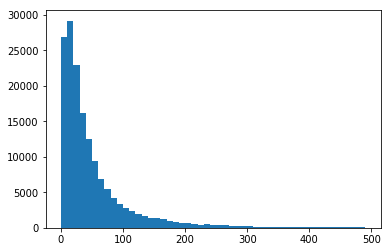

In [90]:
# Selecting Padding
# find length of each sentence and plot the length
number_of_words = [len(comment) for comment in tokenized_train]
plt.hist(number_of_words, bins = np.arange(0, 500, 10));

In [66]:
# Padding to make it uniform
maxlen = 200
X = pad_sequences(tokenized_train, maxlen = maxlen)

In [104]:
labels = df.iloc[:,2].values

In [112]:
# Baseline Benchmark 
1 - df.iloc[:,2].sum()/df.iloc[:,2].count()

0.9041555169799024

In [106]:
from keras.utils import to_categorical
y = to_categorical(labels)

In [113]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127656, 200), (31915, 200), (127656, 2), (31915, 2))

### Step 2: Create the Model Architecture

In [116]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

In [120]:
model = Sequential()
model.add(Embedding(max_features, output_dim=128))
model.add(LSTM(60))
model.add(Dropout(0.1))
model.add(Dense(2, activation='sigmoid'))

### Step 3: Compile the Model & Fit on the Data

In [121]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [123]:
output = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.2)

Train on 102124 samples, validate on 25532 samples
Epoch 1/5
102124/102124 [==============================] - 249s 2ms/step - loss: 0.1538 - acc: 0.9463 - val_loss: 0.1717 - val_acc: 0.9554
Epoch 2/5
102124/102124 [==============================] - 249s 2ms/step - loss: 0.1262 - acc: 0.9562 - val_loss: 0.1270 - val_acc: 0.9569
Epoch 3/5
102124/102124 [==============================] - 249s 2ms/step - loss: 0.1208 - acc: 0.9575 - val_loss: 0.1219 - val_acc: 0.9577
Epoch 4/5
102124/102124 [==============================] - 248s 2ms/step - loss: 0.1175 - acc: 0.9588 - val_loss: 0.1202 - val_acc: 0.9573
Epoch 5/5
102124/102124 [==============================] - 248s 2ms/step - loss: 0.1147 - acc: 0.9594 - val_loss: 0.1198 - val_acc: 0.9580


### Step 4: Evaluate the Model

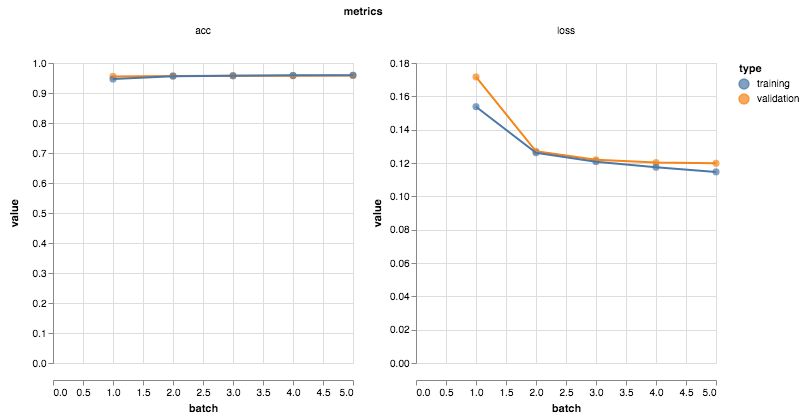

In [124]:
vis.metrics(output.history)

In [125]:
score = model.evaluate(X_test, y_test, verbose=1)

31915/31915 [==============================] - 71s 2ms/step


In [126]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12092583232046986
Test accuracy: 0.957825473915087


### Step 5: Visualise evaluation & Make a prediction

In [127]:
predict_classes = model.predict_classes(X_test)

In [128]:
pd.crosstab(y_test, predict_classes)

Exception: Data must be 1-dimensional